<a href="https://colab.research.google.com/github/rjrahul24/ai-with-python-series/blob/main/08.%20Natural%20Language%20Processing/Code/Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Getting Started with NLTK**

For languages to work fluently, the most important requirement is context. Even for humans, until we do not have the correct context of what is being talked about, we will not be able to function with conversations. To build this context in machines, we make use of the Natural Language Processing Toolkit (NLTK) in Python. This helps the machine understand context the same way humans do. Let us walkthrough a few basics of NLTK.

In [1]:
pip install nltk

In [2]:
# Gensim is a python package that has a robust structure of semantic modelling. 
# Pattern is another package that helps gensim work accurately.
# NLTK has a large amount of prebuilt data that helps during the processing of human languages. 
# Whenever we are in a working session, it is advised to download all of this data.

In [3]:
pip install gensim

In [4]:
pip install pattern

In [5]:
# We will be performing Noun-Phrase chunking in this example which is a category of chunking. Here we predefine grammatical notions that the program will use to perform the chunking.
import nltk
# The next step is to define the sentence’s structure.
# DT -> Determinant, VBP ->Verb, JJ -> Adjective, IN -> Preposition and NN -> Noun
test_phrases = [("an","DT"), ("astonishing","JJ"), ("leopard","NN"), ("is","VBP"), ("running","VBP"), ("around", "IN"), ("the","DT"),("ground","NN")]

In [6]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [7]:
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


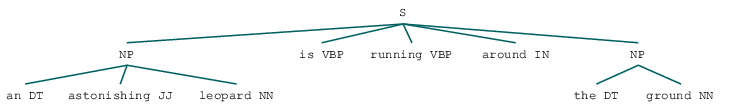

In [8]:
# Chunking allows us to define the grammar as a regular expression
def_grammar = "NP:{<DT>?<JJ>*<NN>}"
parse_chunk_tests = nltk.RegexpParser(def_grammar)
parse_chunk_tests.parse(test_phrases)

In [9]:
# We see that the chunking has distinguished input phrases based on the grammar differentiation provided.

**Topic Modelling and Identifying Patterns in Data**

Documents and discussions are generally always revolving around topics. The base of every conversation is one topic and discussions revolve around it. For NLP to understand and work on human conversations, it needs to derive the topic of discussion within the given input. To compute the same, algorithms run pattern matching theories on the input to determine the topic. This process is called topic modelling. It is used to uncover the hidden topics/core of documents that need processing. 


In [10]:
# Let us now work out an example using NLP to read through a webpage and classify what the page is about

In [18]:
# Let us take a webpage link and use urllib module to crawl through the contents of this page.
import urllib.request
test_resp =  urllib.request.urlopen('https://en.wikipedia.org/wiki/Tesla,_Inc.')
input_page = test_resp.read()
print(input_page)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Tesla, Inc. - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ebc3973f-51d6-44bf-bcd6-cb2fa6e56dfb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tesla,_Inc.","wgTitle":"Tesla, Inc.","wgCurRevisionId":1035155273,"wgRevisionId":1035155273,"wgArticleId":5533631,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","CS1 German-language sources (de)","CS1 Norwegian-language sources (no)","Articles containing potentially dated statements

In [19]:
# We will now work with Beautiful Soup (a Python Library) that helps in cleaning the web text extracted from HTML and XML pages.
from bs4 import BeautifulSoup
soup_type = BeautifulSoup(input_page,'html5lib')
input_text = soup_type.get_text(strip = True)
print(input_text)

Tesla, Inc. - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ebc3973f-51d6-44bf-bcd6-cb2fa6e56dfb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tesla,_Inc.","wgTitle":"Tesla, Inc.","wgCurRevisionId":1035155273,"wgRevisionId":1035155273,"wgArticleId":5533631,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","CS1 German-language sources (de)","CS1 Norwegian-language sources (no)","Articles containing potentially dated statements from December 2017","All articles containing potentially dated statements","All articles with dead external links",
"Article

In [20]:
# This is now a grouped and clean output generated by BeautifulSoup
# These are now clean data chunks. The next step is to convert these chunks of text into tokens that the NLP algorithm can use.
build_tokens = [token for token in input_text.split()]
print(build_tokens)

['Tesla,', 'Inc.', '-', 'Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ebc3973f-51d6-44bf-bcd6-cb2fa6e56dfb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tesla,_Inc.","wgTitle":"Tesla,', 'Inc.","wgCurRevisionId":1035155273,"wgRevisionId":1035155273,"wgArticleId":5533631,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages', 'with', 'non-numeric', 'formatnum', 'arguments","CS1', 'German-language', 'sources', '(de)","CS1', 'Norwegian-language', 'sources', '(no)","Articles', 'containing', 'potentially', 'dated', 'statements', 'from', 'December', '2017","All', 'articles', 'containing', 'poten

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# This output consists of tokenized words
# We now count the word frequency of the contents
# The FreqDist() function within NLTK works best for this purpose. 
# We will preprocess the data by removing words like (at, the, a, for) that will not give meaning to the result. 
from nltk.corpus import stopwords
in_request = stopwords.words('english')
clean_text = build_tokens[:]
for token in build_tokens:
    if token in stopwords.words('english'):
        clean_text.remove(token)        
freq_dist = nltk.FreqDist(clean_text)
for k,v in freq_dist.items():
    print(str(k) + ':' + str(v))

Streaming output truncated to the last 5000 lines.
Trucks':1
Custom:2
Chassis:2
van:1
2010.[332][333]The:1
electric-powertrain:1
theMercedes-Benz:2
A-Class:4
E-Cell,:1
trial:3
beginning:1
2011.[334][335]Tesla:1
co-developed:1
B250e's:1
powertrain,:1
2017.[336]The:1
rated:2
134:1
hp:1
(100:1
kW):1
230:1
pound:1
force-feet:1
(310:1
N⋅m),:1
36:1
(130:1
battery.:1
km:1
(124:1
mi):1
150:1
km/h:1
(93:1
mph).[337]Daimler:1
divisionSmartproduced:1
theSmart:1
ED2cars:1
14-kilowatt-hour:1
(50:1
MJ)lithium-ion:1
batteryfrom:1
Tesla.[338][339]ToyotaToyota:1
RAV4:12
EV,:2
componentsIn:1
work:2
development,:1
Toyota's:1
conditional:1
portion:2
factory.[25]In:1
compactToyota:1
EV.[340]A:1
demonstrator:1
2010Los:1
Angeles:9
Show.:1
RAV4s:1
(Phase:1
Zero:1
vehicles):1
demonstration:2
evaluation:1
program:1
ran:1
2011.:2
metal-oxide:1
components[341][342]based:1
Roadster.[9][343]In:1
unveiled,:1
pack,:1
electronics:1
sedan:1
(also:1
2012).[344]The:1
EV:15
limited:1
run:2
3,000:1
produced.[345]The:1
2014

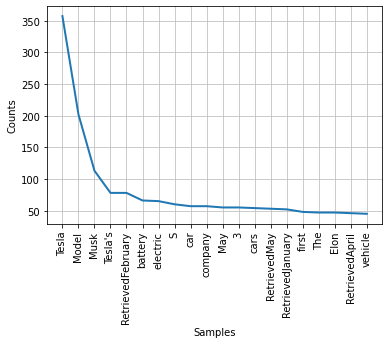

In [23]:
# Lastly, we plot this output into a graph that will visually tell us what topic is most talked about throughout this web page
freq_dist.plot(20, cumulative=False)

The Output clearly tells us that the Page was primarily talking about **"TESLA"**